In [1]:
import numpy as np
import pandas as pd
import keras
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from keras.utils import plot_model

2024-05-10 12:56:03.253341: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-10 12:56:03.498166: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 12:56:06.141212: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 12:56:06.141525: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 12:56:06.928514: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
import tensorflow as tf

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# metadata 
print(letter_recognition.metadata) 
  
# variable information 
print(letter_recognition.variables) 


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [4]:
y

,lettr
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [11]:
X

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [14]:
y=le.fit_transform(y)

/home/alam/.local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
list(y)

[19,
 8,
 3,
 13,
 6,
 18,
 1,
 0,
 9,
 12,
 23,
 14,
 6,
 12,
 17,
 5,
 14,
 2,
 19,
 9,
 9,
 7,
 18,
 14,
 9,
 2,
 12,
 22,
 7,
 6,
 11,
 11,
 23,
 1,
 12,
 6,
 14,
 15,
 6,
 4,
 23,
 4,
 23,
 6,
 21,
 23,
 22,
 6,
 17,
 18,
 24,
 11,
 24,
 9,
 18,
 16,
 16,
 3,
 2,
 11,
 13,
 2,
 4,
 23,
 7,
 11,
 7,
 4,
 24,
 7,
 16,
 16,
 16,
 9,
 9,
 3,
 17,
 12,
 0,
 13,
 12,
 15,
 2,
 15,
 13,
 22,
 21,
 21,
 12,
 4,
 13,
 24,
 22,
 14,
 13,
 7,
 14,
 13,
 7,
 20,
 24,
 18,
 18,
 19,
 2,
 21,
 19,
 10,
 3,
 22,
 8,
 4,
 5,
 8,
 7,
 20,
 2,
 5,
 0,
 25,
 23,
 13,
 17,
 1,
 1,
 20,
 9,
 5,
 12,
 7,
 0,
 14,
 4,
 20,
 0,
 23,
 18,
 9,
 10,
 8,
 15,
 19,
 2,
 7,
 0,
 11,
 19,
 0,
 21,
 20,
 8,
 25,
 21,
 12,
 11,
 14,
 1,
 0,
 10,
 7,
 19,
 22,
 5,
 0,
 4,
 12,
 1,
 12,
 24,
 21,
 18,
 2,
 7,
 20,
 15,
 25,
 4,
 13,
 15,
 7,
 19,
 1,
 20,
 18,
 5,
 9,
 17,
 4,
 15,
 8,
 10,
 3,
 1,
 7,
 12,
 15,
 14,
 18,
 10,
 21,
 5,
 24,
 3,
 25,
 16,
 18,
 1,
 10,
 21,
 1,
 24,
 14,
 25,
 11,
 9,
 25,
 0,
 11,


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
X.values.shape

(20000, 16)

In [20]:
X,y = shuffle (X,y, random_state=10)

In [21]:
X_train = X.values[:14000,:]
y_train = y[:14000]

In [22]:
X_val = X.values[14000:17000,:]
y_val = y[14000:17000]
#for parameter optimization

In [23]:
X_test = X.values[17000:20000,:]
y_test = y[17000:20000]
#for final evaluation

In [24]:
from tensorflow import keras

from keras.models import Sequential #the model is built adding layers one after the other

from keras.layers import Dense #fully connected layers: every output talks to every input

from keras.layers import Dropout #for regularization

In [25]:
model = Sequential()

# Add an input layer and specify its size (number of original features)

model.add(Dense(20, activation='relu', input_shape=(16,)))

model.add(Dropout(0.2)) #This is the dropout fraction

# Add one hidden layer and specify its size

model.add(Dense(20, activation='relu'))

model.add(Dropout(0.2)) #This is the dropout fraction

# Add an output layer 

model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) 

In [26]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
mynet = model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs = 100,  batch_size=200)

Epoch 1/100
70/70 [==============================] - 5s 31ms/step - loss: -317.6829 - accuracy: 0.0392 - val_loss: -773.6268 - val_accuracy: 0.0433
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: -2055.1919 - accuracy: 0.0389 - val_loss: -4244.5273 - val_accuracy: 0.0433
Epoch 3/100
70/70 [==============================] - 0s 7ms/step - loss: -8522.8271 - accuracy: 0.0389 - val_loss: -14771.5771 - val_accuracy: 0.0433
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: -24237.6641 - accuracy: 0.0389 - val_loss: -37337.4219 - val_accuracy: 0.0433
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: -54823.3008 - accuracy: 0.0389 - val_loss: -77793.8438 - val_accuracy: 0.0433
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: -105366.4219 - accuracy: 0.0389 - val_loss: -140181.2812 - val_accuracy: 0.0433
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: -179271.0938 - accuracy: 

In [31]:
import matplotlib.pyplot as plt

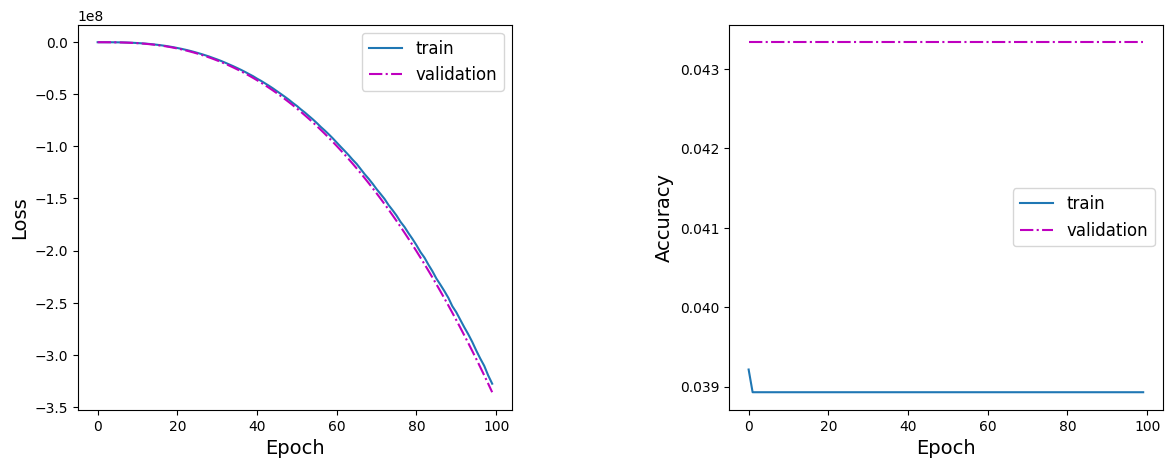

In [32]:
plt.figure(figsize=(14,5))

plt.subplot(121)

plt.plot(mynet.history['loss'], label = 'train')
plt.plot(mynet.history['val_loss'],'-.m', label = 'validation')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)

plt.subplot(122)

plt.plot(mynet.history['accuracy'], label = 'train')
plt.plot(mynet.history['val_accuracy'], '-.m', label = 'validation')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(fontsize = 12)
plt.subplots_adjust(wspace=0.5)
#plt.show()

#plt.savefig('ScaledNN.png', dpi= 300)

In [33]:
scores = model.evaluate(X_test, y_test, verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

94/94 [==============================] - 1s 4ms/step - loss: -333223328.0000 - accuracy: 0.0303
Accuracy: 3.03%


In [34]:
scores

[-333223328.0, 0.03033333271741867]

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(X_train)

StandardScaler()

In [37]:
Xst_train = scaler.transform(X_train)
Xst_val = scaler.transform(X_val)
Xst_test = scaler.transform(X_test)

In [38]:
mynet = model.fit(Xst_train, y_train, validation_data= (Xst_val, y_val), epochs=100, batch_size=200)

Epoch 1/100
70/70 [==============================] - 2s 13ms/step - loss: -10665572.0000 - accuracy: 0.0389 - val_loss: -10978544.0000 - val_accuracy: 0.0433
Epoch 2/100
70/70 [==============================] - 1s 13ms/step - loss: -10647790.0000 - accuracy: 0.0389 - val_loss: -11010245.0000 - val_accuracy: 0.0433
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: -10743933.0000 - accuracy: 0.0389 - val_loss: -11045006.0000 - val_accuracy: 0.0433
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: -10756935.0000 - accuracy: 0.0389 - val_loss: -11084275.0000 - val_accuracy: 0.0433
Epoch 5/100
70/70 [==============================] - 0s 7ms/step - loss: -10750263.0000 - accuracy: 0.0389 - val_loss: -11125166.0000 - val_accuracy: 0.0433
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: -10923893.0000 - accuracy: 0.0389 - val_loss: -11167519.0000 - val_accuracy: 0.0433
Epoch 7/100
70/70 [==============================] - 0s 

In [39]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
mynet = model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs = 100,  batch_size=200)

Epoch 1/100
70/70 [==============================] - 1s 8ms/step - loss: -650887808.0000 - accuracy: 0.0389 - val_loss: -686852672.0000 - val_accuracy: 0.0433
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: -696538048.0000 - accuracy: 0.0389 - val_loss: -723230336.0000 - val_accuracy: 0.0433
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: -729039232.0000 - accuracy: 0.0389 - val_loss: -753217472.0000 - val_accuracy: 0.0433
Epoch 4/100
70/70 [==============================] - 0s 7ms/step - loss: -758753280.0000 - accuracy: 0.0389 - val_loss: -779732672.0000 - val_accuracy: 0.0433
Epoch 5/100
70/70 [==============================] - 1s 8ms/step - loss: -778304512.0000 - accuracy: 0.0389 - val_loss: -804214464.0000 - val_accuracy: 0.0433
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: -807169216.0000 - accuracy: 0.0389 - val_loss: -827324608.0000 - val_accuracy: 0.0433
Epoch 7/100
70/70 [===========================

In [41]:
scores = model.evaluate(X_test, y_test, verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

94/94 [==============================] - 1s 5ms/step - loss: -3291819008.0000 - accuracy: 0.0303
Accuracy: 3.03%


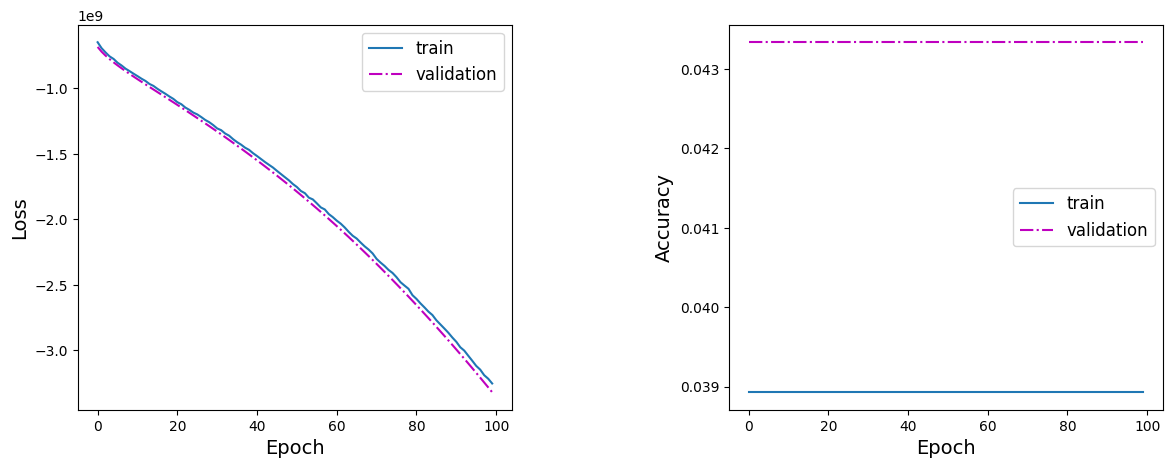

In [42]:
plt.figure(figsize=(14,5))

plt.subplot(121)

plt.plot(mynet.history['loss'], label = 'train')
plt.plot(mynet.history['val_loss'],'-.m', label = 'validation')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)

plt.subplot(122)

plt.plot(mynet.history['accuracy'], label = 'train')
plt.plot(mynet.history['val_accuracy'], '-.m', label = 'validation')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(fontsize = 12)
plt.subplots_adjust(wspace=0.5)
#plt.show()

#plt.savefig('ScaledNN.png', dpi= 300)

In [43]:
from keras.utils import to_categorical

In [44]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [45]:
model2 = Sequential()
model2.add(Dense(64, activation ='relu', input_shape=(16,)))
model2.add(Dropout(0.01))
model2.add(Dense(26, activation ='softmax'))
model2.add(Dropout(0.01))
optimizer = tf.keras.optimizers.Adam(learning_rate =0.001)
model2.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics =['accuracy'])

In [46]:
model2.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7fb8b435c4f0>>

In [47]:
mynet = model2.fit(X_train, y_train, validation_data= (X_val, y_val), epochs = 100,  batch_size=200)

Epoch 1/100
70/70 [==============================] - 3s 13ms/step - loss: 3.7800 - accuracy: 0.1071 - val_loss: 2.6740 - val_accuracy: 0.2367
Epoch 2/100
70/70 [==============================] - 1s 7ms/step - loss: 2.4877 - accuracy: 0.3288 - val_loss: 1.9815 - val_accuracy: 0.4767
Epoch 3/100
70/70 [==============================] - 0s 7ms/step - loss: 1.9710 - accuracy: 0.4936 - val_loss: 1.6330 - val_accuracy: 0.5803
Epoch 4/100
70/70 [==============================] - 0s 7ms/step - loss: 1.7132 - accuracy: 0.5727 - val_loss: 1.4340 - val_accuracy: 0.6230
Epoch 5/100
70/70 [==============================] - 0s 7ms/step - loss: 1.5772 - accuracy: 0.6161 - val_loss: 1.3191 - val_accuracy: 0.6467
Epoch 6/100
70/70 [==============================] - 1s 7ms/step - loss: 1.4582 - accuracy: 0.6458 - val_loss: 1.2150 - val_accuracy: 0.6773
Epoch 7/100
70/70 [==============================] - 1s 7ms/step - loss: 1.3643 - accuracy: 0.6679 - val_loss: 1.1475 - val_accuracy: 0.6983
Epoch 8/100


In [48]:
scores = model2.evaluate(X_test, y_test, verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

94/94 [==============================] - 1s 6ms/step - loss: 0.4498 - accuracy: 0.8650
Accuracy: 86.50%


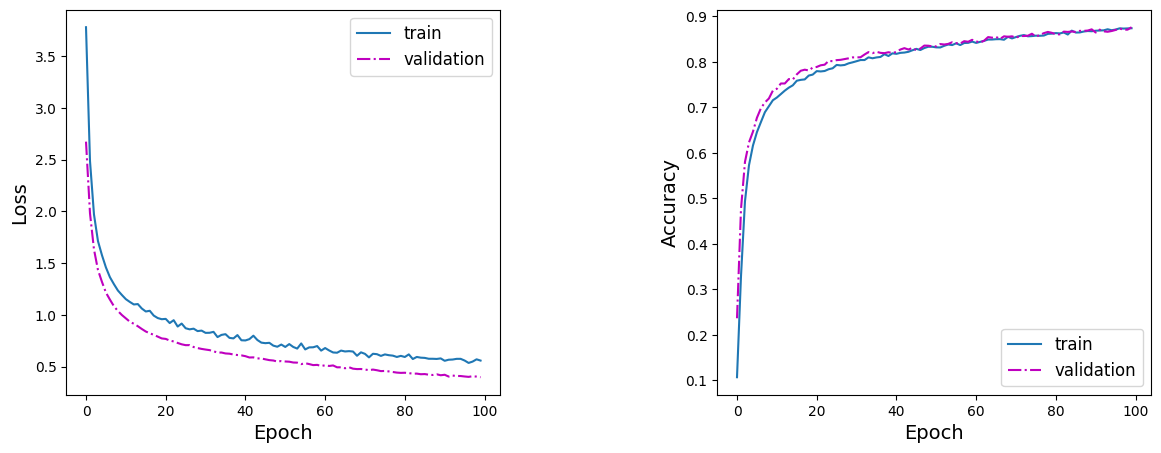

In [49]:
plt.figure(figsize=(14,5))

plt.subplot(121)

plt.plot(mynet.history['loss'], label = 'train')
plt.plot(mynet.history['val_loss'],'-.m', label = 'validation')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)

plt.subplot(122)

plt.plot(mynet.history['accuracy'], label = 'train')
plt.plot(mynet.history['val_accuracy'], '-.m', label = 'validation')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(fontsize = 12)
plt.subplots_adjust(wspace=0.5)
#plt.show()

#plt.savefig('ScaledNN.png', dpi= 300)

Convolutional Neural Network

In [50]:
from keras.layers import Conv1D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets

In [51]:
X_train.shape

(14000, 16)

In [52]:
X_val.shape

(3000, 16)

In [53]:
input_layer = layers.Input((X_train.shape[1],1))
#input_layer = layers.Input(32,32,3)
x = layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv1D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv1D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv1D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(26)(x)
output_layer = layers.Activation("softmax")(x)

model3 = models.Model(input_layer, output_layer)

opt = tf.keras.optimizers.Adam(learning_rate =0.001)
model3.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 16, 32)            128       
                                                                 
 batch_normalization (Batch  (None, 16, 32)            128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 32)             3104      
                                                                 
 batch_normalization_1 (Bat  (None, 8, 32)             128       
 chNormalization)                                            

In [54]:
X_train.shape , y_train.shape, X_val.shape, y_val.shape

((14000, 16), (14000, 26), (3000, 16), (3000, 26))

In [55]:
mynet = model3.fit(X_train, y_train, validation_data= (X_val, y_val), epochs = 20,  batch_size=200)

Epoch 1/20
70/70 [==============================] - 11s 47ms/step - loss: 1.6936 - accuracy: 0.5247 - val_loss: 2.6552 - val_accuracy: 0.3223
Epoch 2/20
70/70 [==============================] - 2s 25ms/step - loss: 0.9092 - accuracy: 0.7457 - val_loss: 1.9404 - val_accuracy: 0.5023
Epoch 3/20
70/70 [==============================] - 2s 26ms/step - loss: 0.7010 - accuracy: 0.8026 - val_loss: 1.0976 - val_accuracy: 0.7673
Epoch 4/20
70/70 [==============================] - 2s 26ms/step - loss: 0.5879 - accuracy: 0.8294 - val_loss: 0.6981 - val_accuracy: 0.8397
Epoch 5/20
70/70 [==============================] - 2s 25ms/step - loss: 0.5051 - accuracy: 0.8527 - val_loss: 0.4856 - val_accuracy: 0.8733
Epoch 6/20
70/70 [==============================] - 2s 23ms/step - loss: 0.4558 - accuracy: 0.8679 - val_loss: 0.4219 - val_accuracy: 0.8843
Epoch 7/20
70/70 [==============================] - 2s 25ms/step - loss: 0.4089 - accuracy: 0.8794 - val_loss: 0.3669 - val_accuracy: 0.8957
Epoch 8/20
7

In [56]:
scores = model3.evaluate(X_test, y_test, verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

94/94 [==============================] - 1s 10ms/step - loss: 0.2106 - accuracy: 0.9290
Accuracy: 92.90%
